In [505]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [506]:
# Reference to public kaggle kernels licensed under Apache 2.0 open source license
# Some cells are inspired by the tutorials of Dante, Yassine Ghouzam and LD Freeman

In [507]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [508]:
train_raw = pd.read_csv("/kaggle/input/titanic/train.csv")
test_raw = pd.read_csv("/kaggle/input/titanic/test.csv")

In [509]:
# Copy Data to clean it
train_data = train_raw.copy()
test_data = test_raw.copy()

# Create list for easy access on both datasets
clean_train_test = [train_data, test_data]

# Create a concat list for info that is split between both datasets
concat_data = pd.concat([train_data, test_data], axis=0, ignore_index=True, sort=True)

# 1. Data Analysis
Let's have a first look into the DataFrame. 

**Competition Description**

> The sinking of the Titanic is one of the most infamous shipwrecks in history.
>
>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
>
>The data has been split into two groups:
>
>training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.
>
>The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.
>
>We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
>
>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
>
>sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
>
>parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [510]:
print(train_raw.info())
print(train_raw.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.

**Investigate missing data cells**

Let's search for every cell that has NaN. This will show us how complete the dataset is and what data cells we might need to fill.

In [511]:
# Analyze for missing data

for dataset in clean_train_test:
    print("")
    for key in list(dataset.columns.values):
        gap = pd.isnull(dataset[key]).sum()
        gap_percentage = gap / len(dataset) * 100
        print("{:.1f}% of {} data is missing".format(gap_percentage, key))


0.0% of PassengerId data is missing
0.0% of Survived data is missing
0.0% of Pclass data is missing
0.0% of Name data is missing
0.0% of Sex data is missing
19.9% of Age data is missing
0.0% of SibSp data is missing
0.0% of Parch data is missing
0.0% of Ticket data is missing
0.0% of Fare data is missing
77.1% of Cabin data is missing
0.2% of Embarked data is missing

0.0% of PassengerId data is missing
0.0% of Pclass data is missing
0.0% of Name data is missing
0.0% of Sex data is missing
20.6% of Age data is missing
0.0% of SibSp data is missing
0.0% of Parch data is missing
0.0% of Ticket data is missing
0.2% of Fare data is missing
78.2% of Cabin data is missing
0.0% of Embarked data is missing


For age and cabin data a significant share is missing. We'll see if it is possible to fill these.
For Embarked data and Fare data only few cells are missing. We probably can fill them right away.

In [512]:
test_data.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Nilsson, Mr. August Ferdinand",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


# 2. Feature Engineering

Let's see what info we can extract from the already available features. As there is a lot of social data we will try to get more detailed info on every person and detect their relations to other passengers. 

For the Embarked data we will detect the most common value and replace the empty cell with it. For the missing Fare cell we will calculate the median value over all cells. 

In [513]:
def plot_feature(key):
    g = sns.catplot(x=key,y="Survived",data=train_data,kind="bar", palette="colorblind", height = 4)
    g.despine(left=True)
    g = g.set_ylabels("survival probability")

In [514]:
# Fill missing data
for dataset in clean_train_test:
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].mean(), inplace = True)

In [515]:
for dataset in clean_train_test:
    dataset['Embarked_Q'] = dataset['Embarked'].map(lambda s: 1 if s == 'Q' else 0)
    dataset['Embarked_S'] = dataset['Embarked'].map(lambda s: 1 if s == 'S' else 0)
    dataset['Embarked_C'] = dataset['Embarked'].map(lambda s: 1 if s == 'C' else 0)  

(None, None, None)

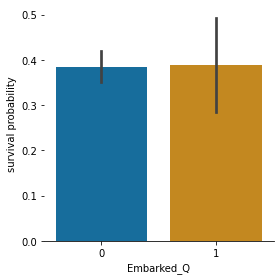

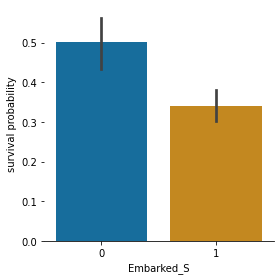

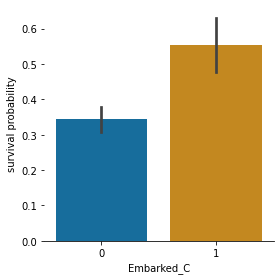

In [516]:
plot_feature('Embarked_Q'), plot_feature('Embarked_S'), plot_feature('Embarked_C')

In [517]:
# Create new feature for family size
for dataset in clean_train_test:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

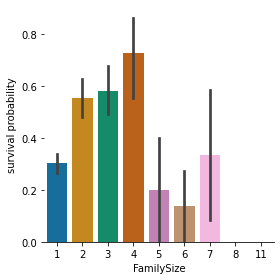

In [518]:
plot_feature('FamilySize')

In [519]:
# Search for travelers that travel alone
for dataset in clean_train_test:
    dataset['TravAlone'] = dataset['FamilySize'].map(lambda s: 1 if  s == 1  else 0)

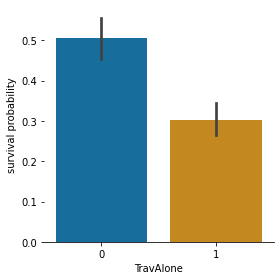

In [520]:
plot_feature('TravAlone')

In [521]:
# Extract Deck from Cabin
for dataset in clean_train_test:
    dataset['Deck'] = dataset['Cabin'].copy()
    dataset['Deck'].fillna('X', inplace = True)
    dataset['Deck'] = dataset['Deck'].map(lambda s: s[0])
    dataset['Deck'] = dataset['Deck'].map(lambda s: 'A' if s == 'T' else s)

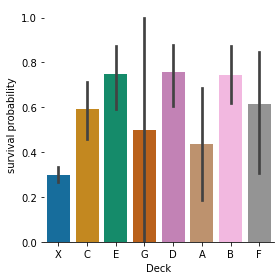

In [522]:
plot_feature('Deck')

In [523]:
# Creat new feature "HasDeck"
for dataset in clean_train_test:
    dataset['HasNoDeck'] = dataset['Deck'].map(lambda s: 1 if s == 'X' else 0)

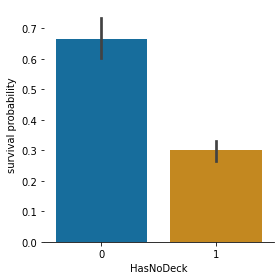

In [524]:
plot_feature('HasNoDeck')

In [525]:
# Create new feature from family size
for dataset in clean_train_test:
    dataset['SmallF'] = dataset['FamilySize'].map(lambda s: 1 if s == 2 else 0)
    dataset['MedF'] = dataset['FamilySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    dataset['LargeF'] = dataset['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

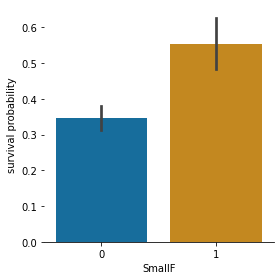

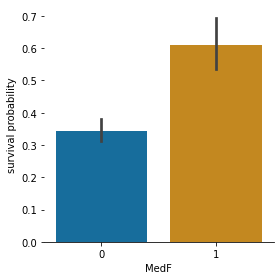

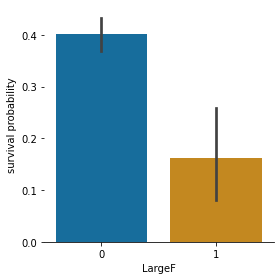

In [526]:
plot_feature('SmallF')
plot_feature('MedF')
plot_feature('LargeF')

**Fare data**

When looking deeper into the fare data we will realize that families/groups sharing a cabin have the same fare prize in their data cell. Passengers from the third class have similar values to person in the first class. To get more realistic fare prise per person we will detect groups of people sharing a cabin by grouping the dataset by the ticket number. 

Afterwards we will devide the fare price by the group size. This will be safed in a new column "FareCorr".

In [527]:
for dataset in clean_train_test:
    dataset['FareCorr'] = dataset['Fare'].copy()

# Similar ticket numbers are split between train and test datasets
concat_data['FareCorr'] = concat_data['Fare'].copy()    
 
# Group by ticketnumber
grouped = concat_data[['Ticket', 'Fare', 'FareCorr']].groupby(['Ticket'])
print(grouped.head)

for _, group in grouped:
    if len(group) > 1:
        # Calculate the price by dividing the ticket price by number of members of group
        corr_fare = group['Fare'].map(lambda s: s/len(group))
          
        # Replace corrected price in the right dataset (identify by index value)
        for idx in group.index:
            if idx < len(train_data):
                train_data.loc[idx, 'FareCorr'] = corr_fare.mean()
            else:
                test_data.loc[idx-len(train_data), 'FareCorr'] = corr_fare.mean()

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fb477fb0d68>>


In [528]:
for dataset in clean_train_test:

    # Apply log to FareCorr to reduce skewness distribution
    dataset["FareCorrLog"] = dataset["FareCorr"].map(lambda i: np.log(i) if i > 0 else 0)

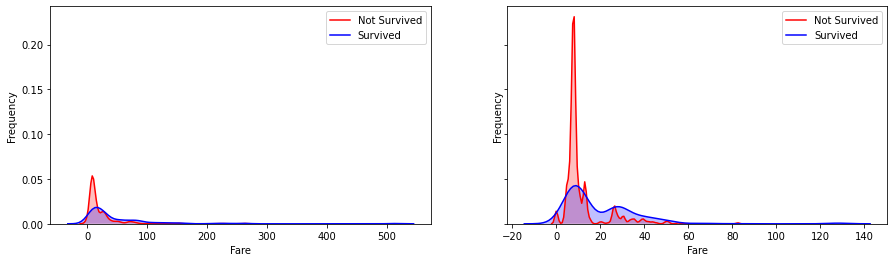

In [529]:
# Compare Fare and FareCorr distibution 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,4))

g = sns.kdeplot(train_data["Fare"][(train_data["Survived"] == 0)], ax = ax1, color="Red", shade = True)
g = sns.kdeplot(train_data["Fare"][(train_data["Survived"] == 1)], ax = ax1, color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

g2 = sns.kdeplot(train_data["FareCorr"][(train_data["Survived"] == 0)], ax = ax2, color="Red", shade = True)
g2 = sns.kdeplot(train_data["FareCorr"][(train_data["Survived"] == 1)], ax = ax2, color="Blue", shade= True)
g2.set_xlabel("Fare")
g2.set_ylabel("Frequency")
g2 = g2.legend(["Not Survived","Survived"])


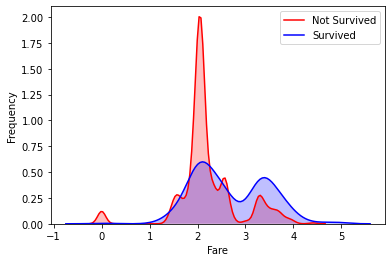

In [530]:
# Explore Age distibution 
g = sns.kdeplot(train_data["FareCorrLog"][(train_data["Survived"] == 0)], color="Red", shade = True)
g = sns.kdeplot(train_data["FareCorrLog"][(train_data["Survived"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("Fare")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

To make the data more accessable by our machine learning algoritmn we will thin the dataset to different bins and save it into the new column "FarCat".

In [531]:
# Create new sub features from 'FareCorr'
for dataset in clean_train_test:
    dataset['FareLow'] = dataset['FareCorr'].map(lambda s: 1 if 0 < s <= 15 else 0)
    dataset['FareMid'] = dataset['FareCorr'].map(lambda s: 1 if 15 < s <= 65 else 0)
    dataset['FareHigh'] = dataset['FareCorr'].map(lambda s: 1 if 65 < s else 0)

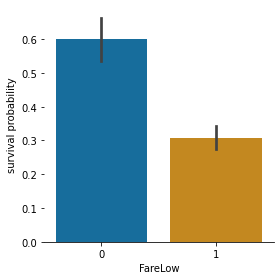

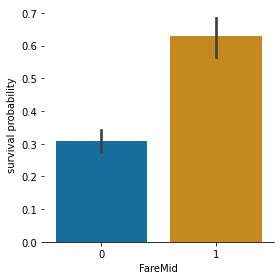

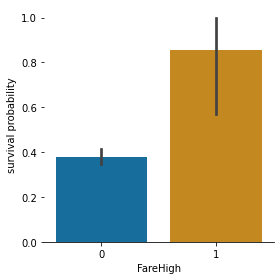

In [532]:
plot_feature('FareLow')
plot_feature('FareMid')
plot_feature('FareHigh')

**Titles**

The names category give a lot of room for feature engineering. The most obvious is probably extracting the titles. From these titles we will be able to differenciate from younger and older people and maybe from people of higher social class. We will also use these titles later to calculate the median age for different passenger groups. The goals is not to create too many different titles to allow for a better learing as our dataset is limited in size.

In [533]:
# Create new sub features from 'FareCorr'
for dataset in clean_train_test:
    title_mr = ['Mr.']
    dataset['Title_Mr'] = dataset['Name'].map(lambda s: 1 if any(title in s for title in title_mr) else 0)
    title_master = ['Master']
    dataset['Title_Master'] = dataset['Name'].map(lambda s: 1 if any(title in s for title in title_master) else 0)
    title_mrs = ['Mrs.', 'Mme']
    dataset['Title_Mrs'] = dataset['Name'].map(lambda s: 1 if any(title in s for title in title_mrs) else 0)
    title_miss = ['Miss', 'Mlle', 'Ms']
    dataset['Title_Miss'] = dataset['Name'].map(lambda s: 1 if any(title in s for title in title_miss) else 0)
    title_special = ['Sir','Don','Dona','Jonkheer','Lady','Countess','Dr', 'Rev','Col','Major','Capt']
    dataset['Title_Special'] = dataset['Name'].map(lambda s: 1 if any(title in s for title in title_special) else 0)

In [534]:
train_data[['Name','Title_Mr','Title_Mrs','Title_Miss','Title_Master','Title_Special']]

,Name,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Special
0,"Braund, Mr. Owen Harris",1,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,0,0
2,"Heikkinen, Miss. Laina",0,0,1,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,0,0
4,"Allen, Mr. William Henry",1,0,0,0,0
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",0,0,0,0,1
887,"Graham, Miss. Margaret Edith",0,0,1,0,0
888,"Johnston, Miss. Catherine Helen ""Carrie""",0,0,1,0,0
889,"Behr, Mr. Karl Howell",1,0,0,0,0


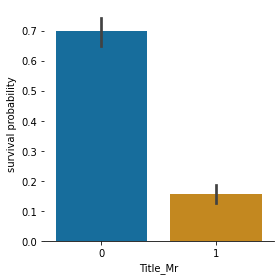

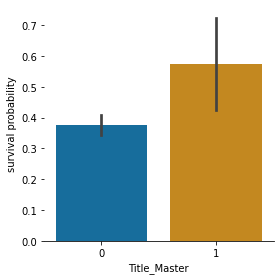

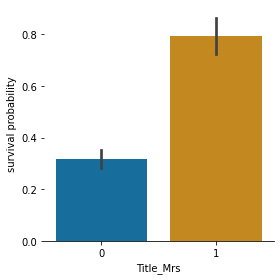

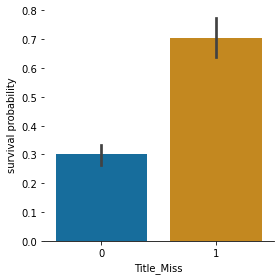

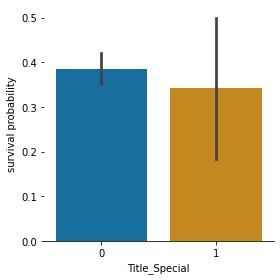

In [535]:
plot_feature('Title_Mr'), plot_feature('Title_Master'), plot_feature('Title_Mrs'), plot_feature('Title_Miss'),
plot_feature('Title_Special')

There is no equivalent for "Master" we will split the title "Miss" into "Young Miss" (travels with parents) and "Miss" (travels without parents and children).

In [536]:
for dataset in clean_train_test:
    dataset['Title_YoungMiss'] = 0
    dataset['Title_YoungMiss'].loc[(dataset['Title_Miss'] == 1) & (dataset['Parch'] != 0) & (dataset['Age'] < 15)] = 1
    dataset['Title_Miss'].loc[(dataset['Title_YoungMiss'] == 1)] = 0

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


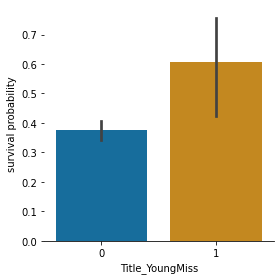

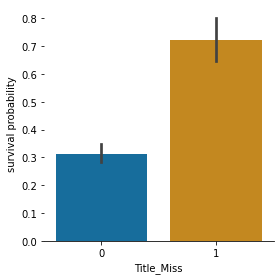

In [537]:
plot_feature('Title_YoungMiss')
plot_feature('Title_Miss')

Let's see how these median age claculations compare.

In [538]:
def print_mean_age():
    # Calculate mean age values for different titles
    print('Mr:',train_data['Age'].loc[train_data['Title_Mr'] == 1].median())
    print('Master:', train_data['Age'].loc[train_data['Title_Master'] == 1].median())
    print('Mrs:', train_data['Age'].loc[train_data['Title_Mrs'] == 1].median())
    print('YoungMiss', train_data['Age'].loc[train_data['Title_YoungMiss'] == 1].median())
    print('Miss', train_data['Age'].loc[train_data['Title_Miss'] == 1].median())
    print('Special:', train_data['Age'].loc[train_data['Title_Special'] == 1].median())
    
print_mean_age()

Mr: 30.0
Master: 3.5
Mrs: 35.0
YoungMiss 4.0
Miss 24.0
Special: 40.0


We can clearly see that "Young Miss" and "Miss" have very different age medians. Therefore we will proceed with the new title called "Young Miss".

Let's also use these info to fill the missing values for age.

In [539]:
for dataset in clean_train_test:
    
    dataset['AgeCorr'] = dataset['Age'].copy()

    # Fill missing age value with mean values according to title
    mean_age_mr = dataset['AgeCorr'].loc[dataset['Title_Mr'] == 1].median()
    mean_age_master = dataset['AgeCorr'].loc[dataset['Title_Master'] == 1].median()
    mean_age_mrs = dataset['AgeCorr'].loc[dataset['Title_Mrs'] == 1].median()
    mean_age_miss = dataset['AgeCorr'].loc[dataset['Title_Miss'] == 1].median()
    mean_age_youngmiss = dataset['AgeCorr'].loc[dataset['Title_YoungMiss'] == 1].median()
    mean_age_special = dataset['AgeCorr'].loc[dataset['Title_Special'] == 1].median()
    
    print(mean_age_mr,mean_age_master,mean_age_mrs,mean_age_miss, mean_age_youngmiss, mean_age_special)
    
    dataset['AgeCorr'].loc[(dataset['Title_Mr'] == 1) & (dataset['AgeCorr'].isna() == True)]  = mean_age_mr
    dataset['AgeCorr'].loc[(dataset['Title_Master'] == 1) & (dataset['AgeCorr'].isna() == True)] = mean_age_master
    dataset['AgeCorr'].loc[(dataset['Title_Mrs'] == 1) & (dataset['AgeCorr'].isna() == True)] =  mean_age_mrs
    dataset['AgeCorr'].loc[(dataset['Title_Miss'] == 1) & (dataset['AgeCorr'].isna() == True)]  = mean_age_miss
    dataset['AgeCorr'].loc[(dataset['Title_YoungMiss'] == 1) & (dataset['AgeCorr'].isna() == True)] = mean_age_youngmiss
    dataset['AgeCorr'].loc[(dataset['Title_Special'] == 1) & (dataset['AgeCorr'].isna() == True)] =  mean_age_special


30.0 3.5 35.0 24.0 4.0 40.0
28.5 7.0 36.5 23.0 2.0 39.0


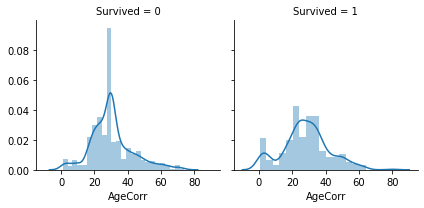

In [540]:
# Explore Age vs Survived
g = sns.FacetGrid(train_data, col='Survived')
g = g.map(sns.distplot, "AgeCorr")

In [541]:
for dataset in clean_train_test:
    dataset['AgeCat']= pd.cut(dataset['AgeCorr'], bins=[0,14.9,30,45,60,max(dataset['AgeCorr']+1)], labels=['1','2','3','4','5'])

In [542]:
# Create new sub features from 'Age'
for dataset in clean_train_test:
    dataset['Age_1'] = dataset['AgeCorr'].map(lambda s: 1 if 0 < s < 15 else 0)
    dataset['Age_2'] = dataset['AgeCorr'].map(lambda s: 1 if 15 <= s < 30 else 0)
    dataset['Age_3'] = dataset['AgeCorr'].map(lambda s: 1 if 30 <= s < 45 else 0)
    dataset['Age_4'] = dataset['AgeCorr'].map(lambda s: 1 if 45 <= s < 60 else 0)
    dataset['Age_5'] = dataset['AgeCorr'].map(lambda s: 1 if 60 <= s else 0)

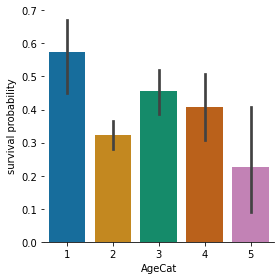

In [543]:
plot_feature('AgeCat')
#plot_feature('Age_1')
#plot_feature('Age_2')
#plot_feature('Age_3')
#plot_feature('Age_4')
#plot_feature('Age_5')

We all know the rule "Women and Children First". It's probably reasonable that women and children have a higher chance of survival. We will extract an additional label "Child" from all the female and male passengers. I guess that it doesn't really matter if the child is male or female. We will later check if that feature give more insight than sex alone.

In [544]:
for dataset in clean_train_test:
    
    dataset['MFK'] = dataset['Sex'].copy()
    dataset['MFK'].loc[dataset['AgeCorr'] <15] = 'child'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


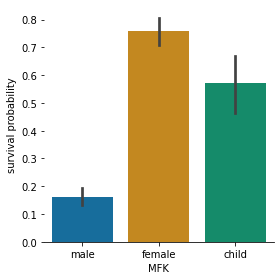

In [545]:
plot_feature('MFK')

In [546]:
# Create new sub features from 'Pclass'
for dataset in clean_train_test:
    dataset['MFK_Male'] = dataset['MFK'].map(lambda s: 1 if s == 'male' else 0)
    dataset['MFK_Female'] = dataset['MFK'].map(lambda s: 1 if s == 'female' else 0)
    dataset['MFK_Child'] = dataset['MFK'].map(lambda s: 1 if s == 'child' else 0)

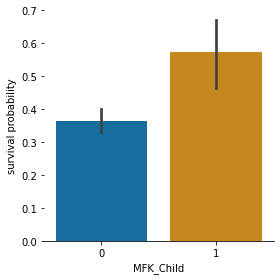

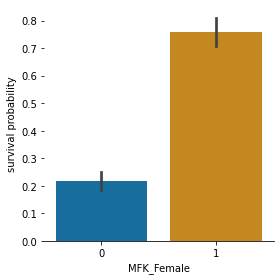

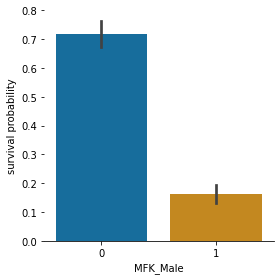

In [547]:
plot_feature('MFK_Child')
plot_feature('MFK_Female')
plot_feature('MFK_Male')

As the feature "Pclass" is not continous we will save it into three different features.

In [548]:
# Create new sub features from 'Pclass'
for dataset in clean_train_test:
    dataset['Pclass_1'] = dataset['Pclass'].map(lambda s: 1 if s == 1 else 0)
    dataset['Pclass_2'] = dataset['Pclass'].map(lambda s: 1 if s == 2 else 0)
    dataset['Pclass_3'] = dataset['Pclass'].map(lambda s: 1 if s == 3 else 0)

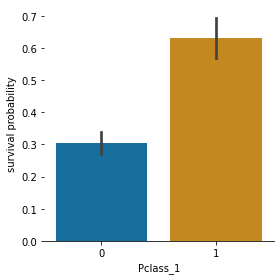

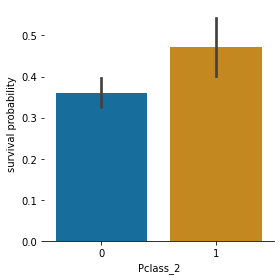

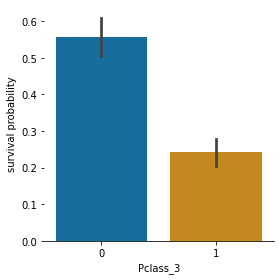

In [549]:
plot_feature('Pclass_1')
plot_feature('Pclass_2')
plot_feature('Pclass_3')

**Family Survival**

This is a long shot and might be seen as a little hack. It is only possible because our training and test set will not be growing over time. The thinking behind this is that families probably stay together and if they made it to a rescue ship they probably all lifed. We will detect families in both datasets and group them together. So let's add them together with concat.

Afterwards we will check if a majority of the family survied and put the "Family Survival" to 1. If the majority dies we will put 0. If we are unsure (the majority is in the test set where the label survival is not set) we will put it to 0.5.

In [550]:
# Extract the last name
concat_data['Last_Name'] = concat_data['Name'].apply(lambda x: str.split(x, ",")[0])

# Set a default value for all passengers
concat_data['FamilySurvival'] = 0.5

concat_data['Survived_Filled'] = concat_data['Survived'].copy()
concat_data['Survived_Filled'].fillna(0.5, inplace = True)

# Group by Last Name
for _, group in concat_data[['Survived_Filled', 'Last_Name', 'Ticket','Survived']].groupby(['Last_Name']):

    if len(group) > 1:
        # A Family group is found.
        #print(group)
        #print(group['Survived_Filled'])
        #print(group['Survived_Filled'].mean())
        
        surv_prop = group['Survived_Filled'].mean()
        
        for idx in group.index:
            if idx < len(train_data):
                if surv_prop > 0.66:
                    train_data.loc[idx, 'FamilySurvival'] = 1.
                elif surv_prop < 0.33:
                    train_data.loc[idx, 'FamilySurvival'] = 0.
            else:
                if surv_prop > 0.66:
                    test_data.loc[idx-len(train_data), 'FamilySurvival'] = 1.
                elif surv_prop < 0.33:
                    test_data.loc[idx-len(train_data), 'FamilySurvival'] = 0.
               
                    
                    
# Group by TicketNr
for _, group in concat_data[['Survived_Filled', 'Last_Name', 'Ticket']].groupby(['Ticket']):

    if len(group) > 1:
        # A cabin group is found.
        #print(group)
        #print(group['Survived_Filled'])
        #print(group['Survived_Filled'].mean())
        
        surv_prop = group['Survived_Filled'].mean()
        
        for idx in group.index:
            if idx < len(train_data):
                if surv_prop > 0.5:
                    train_data.loc[idx, 'FamilySurvival'] = 1.
                elif surv_prop < 0.5:
                    train_data.loc[idx, 'FamilySurvival'] = 0.
            else:
                if surv_prop > 0.5:
                    test_data.loc[idx-len(train_data), 'FamilySurvival'] = 1.
                elif surv_prop < 0.5:
                    test_data.loc[idx-len(train_data), 'FamilySurvival'] = 0.
               

In [551]:
for dataset in clean_train_test:
    dataset['FamilySurvival'].fillna(0.5, inplace = True)

In [552]:
for dataset in clean_train_test:
    dataset['FamilySurvival_1'] = dataset['FamilySurvival'].map(lambda s: 1 if s == 1. else 0)
    dataset['FamilySurvival_0.5'] = dataset['FamilySurvival'].map(lambda s: 1 if s == 0.5 else 0)
    dataset['FamilySurvival_0'] = dataset['FamilySurvival'].map(lambda s: 1 if s == 0. else 0)

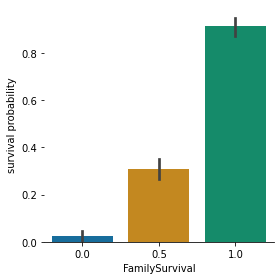

In [553]:
plot_feature('FamilySurvival')
#plot_feature('FamilySurvival_1'), plot_feature('FamilySurvival_0.5'), plot_feature('FamilySurvival_0')

In [554]:
#Age data missing
for dataset in clean_train_test:
    dataset['AgeMissing'] = dataset['Age'].copy()
    dataset['AgeMissing'].fillna(999, inplace = True)
    dataset['AgeMissing'] = dataset['AgeMissing'].map(lambda s: 1 if s == 999. else 0)    

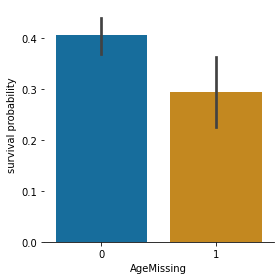

In [555]:
plot_feature('AgeMissing')

In [556]:
#Cabin data missing
for dataset in clean_train_test:
    dataset['CabinMissing'] = dataset['Cabin'].copy()
    dataset['CabinMissing'].fillna('missing', inplace = True)
    dataset['CabinMissing'] = dataset['CabinMissing'].map(lambda s: 1 if s == 'missing' else 0)    

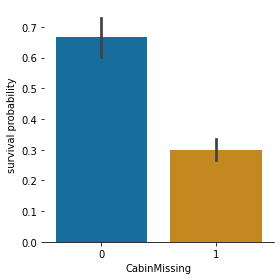

In [557]:
plot_feature('CabinMissing')

In [558]:
# Analyze for missing data

for dataset in clean_train_test:
    print("")
    for key in list(dataset.columns.values):
        gap = pd.isnull(dataset[key]).sum()
        gap_percentage = gap / len(dataset) * 100
        print("{:.1f}% of {} data is missing".format(gap_percentage, key))


0.0% of PassengerId data is missing
0.0% of Survived data is missing
0.0% of Pclass data is missing
0.0% of Name data is missing
0.0% of Sex data is missing
19.9% of Age data is missing
0.0% of SibSp data is missing
0.0% of Parch data is missing
0.0% of Ticket data is missing
0.0% of Fare data is missing
77.1% of Cabin data is missing
0.0% of Embarked data is missing
0.0% of Embarked_Q data is missing
0.0% of Embarked_S data is missing
0.0% of Embarked_C data is missing
0.0% of FamilySize data is missing
0.0% of TravAlone data is missing
0.0% of Deck data is missing
0.0% of HasNoDeck data is missing
0.0% of SmallF data is missing
0.0% of MedF data is missing
0.0% of LargeF data is missing
0.0% of FareCorr data is missing
0.0% of FareCorrLog data is missing
0.0% of FareLow data is missing
0.0% of FareMid data is missing
0.0% of FareHigh data is missing
0.0% of Title_Mr data is missing
0.0% of Title_Master data is missing
0.0% of Title_Mrs data is missing
0.0% of Title_Miss data is miss

# 3. Features selection

Let's see what features have built up and think about what we want to keep and what to drop.

In [561]:
features = list(train_data.columns.values)
features.remove('Survived')

# Drop features that didn't make the cut.
features.remove('PassengerId')
features.remove('Name')
features.remove('Ticket')
features.remove('Cabin')
features.remove('HasNoDeck')
#features.remove('Deck')
features.remove('Sex')
#features.remove('MFK')
features.remove('MFK_Male')
features.remove('MFK_Female')
features.remove('MFK_Child')
features.remove('Pclass') 
#features.remove('Pclass_1')
#features.remove('Pclass_2')
#features.remove('Pclass_3')
features.remove('Age')
features.remove('AgeCorr')
#features.remove('AgeCat')
features.remove('Age_1')
features.remove('Age_2')
features.remove('Age_3')
features.remove('Age_4')
features.remove('Age_5')
features.remove('FamilySurvival')
#features.remove('FamilySurvival_1')
#features.remove('FamilySurvival_0.5')
#features.remove('FamilySurvival_0')
features.remove('Fare')
features.remove('FareCorr')
features.remove('FareCorrLog')
#features.remove('FareLow')
#features.remove('FareMid')
#features.remove('FareHigh')
features.remove('Parch')
features.remove('SibSp')
features.remove('FamilySize')
#features.remove('TravAlone')
#features.remove('SmallF')
#features.remove('MedF')
#features.remove('LargeF')
features.remove('AgeMissing') 
features.remove('CabinMissing') 
features.remove('Embarked')
#features.remove('Embarked_Q')
#features.remove('Embarked_C')
#features.remove('Embarked_S')
#features.remove('Title_Master')
#features.remove('Title_Mr')
#features.remove('Title_Mrs')
#features.remove('Title_Miss')
#features.remove('Title_YoungMiss')
#features.remove('Title_Special')

print(features)

['Embarked_Q', 'Embarked_S', 'Embarked_C', 'TravAlone', 'Deck', 'SmallF', 'MedF', 'LargeF', 'FareLow', 'FareMid', 'FareHigh', 'Title_Mr', 'Title_Master', 'Title_Mrs', 'Title_Miss', 'Title_Special', 'Title_YoungMiss', 'AgeCat', 'MFK', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySurvival_1', 'FamilySurvival_0.5', 'FamilySurvival_0']


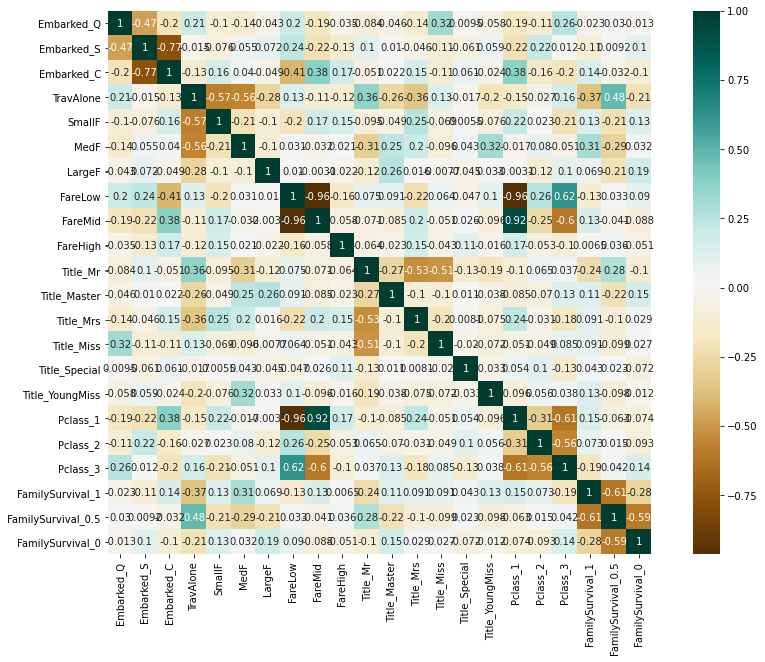

In [562]:
plt.figure(figsize = (15,10))
g = sns.heatmap(dataset[features].corr(),cmap="BrBG",annot=True, square=True, )

This is our final list of features. Fell free to try different sets of features

# 4. Model Analysis and Hyperparameter Tuning

In [563]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   3252      0 --:--:-- --:--:-- --:--:--  3220
Updating fastai...
Done.


In [564]:
from fastai.tabular import *

In [566]:
dep_var = 'Survived'

#cont_names = ['FareCorr']
cat_names = features

#for key in cont_names:
#    cat_names.remove(key)

print(cat_names)
#print(cont_names)

procs = [Categorify, Normalize]

['Embarked_Q', 'Embarked_S', 'Embarked_C', 'TravAlone', 'Deck', 'SmallF', 'MedF', 'LargeF', 'FareLow', 'FareMid', 'FareHigh', 'Title_Mr', 'Title_Master', 'Title_Mrs', 'Title_Miss', 'Title_Special', 'Title_YoungMiss', 'AgeCat', 'MFK', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FamilySurvival_1', 'FamilySurvival_0.5', 'FamilySurvival_0']


In [567]:
data = (TabularList.from_df(train_data, cat_names=cat_names,cont_names=cont_names, procs=procs) #, 
                           .split_by_rand_pct(0.2)
                           .label_from_df(cols=dep_var)
                           .databunch())

In [568]:
data.show_batch(rows=10)

Embarked_Q,Embarked_S,Embarked_C,TravAlone,Deck,SmallF,MedF,LargeF,FareLow,FareMid,FareHigh,Title_Mr,Title_Master,Title_Mrs,Title_Miss,Title_Special,Title_YoungMiss,AgeCat,MFK,Pclass_1,Pclass_2,Pclass_3,FamilySurvival_1,FamilySurvival_0.5,FamilySurvival_0,FareCorr,target
0,1,0,0,X,0,0,1,1,0,0,0,1,0,0,0,0,1,child,0,0,1,1,0,0,-0.7645,0
0,1,0,0,X,0,1,0,1,0,0,0,0,1,0,0,0,3,female,0,0,1,0,1,0,-0.5071,1
0,1,0,0,X,0,0,1,1,0,0,1,0,0,0,0,0,3,male,0,0,1,0,0,1,-0.7657,0
0,1,0,0,X,0,1,0,1,0,0,1,0,0,0,0,0,3,male,0,1,0,0,0,1,-0.3144,0
0,1,0,1,X,0,0,0,1,0,0,0,0,0,1,0,0,3,female,0,0,1,0,1,0,-0.3827,0
1,0,0,1,X,0,0,0,1,0,0,0,0,0,1,1,0,2,female,0,0,1,0,1,0,-0.5202,1
0,0,1,0,B,1,0,0,0,0,1,1,0,0,0,1,0,3,male,1,0,0,1,0,0,8.4830,1
0,1,0,1,E,0,0,0,0,1,0,1,0,0,0,0,0,4,male,1,0,0,0,0,1,0.8401,0
0,1,0,1,X,0,0,0,1,0,0,1,0,0,0,0,0,2,male,0,0,1,0,1,0,-0.5576,0
0,0,1,1,B,0,0,0,0,0,1,1,0,0,0,0,0,3,male,1,0,0,1,0,0,8.4830,1


In [569]:
learn = tabular_learner(data,layers=[200,100], metrics=accuracy) 

In [570]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.468144,0.537389,0.825843,00:00
1,0.393767,0.464637,0.870786,00:00
2,0.360059,0.383645,0.870786,00:00


In [571]:
learn.save('stage-1')

In [490]:
learn.load('stage-2')

Learner(data=TabularDataBunch;

Train: LabelList (713 items)
x: TabularList
TravAlone 0; HasNoDeck 1; SmallF 1; MedF 0; LargeF 0; Title_Mr 1; Title_Master 0; Title_Mrs 0; Title_Miss 0; Title_Special 0; Title_YoungMiss 0; Age_1 0; Age_2 1; Age_3 0; Age_4 0; Age_5 0; MFK_Male 1; MFK_Female 0; MFK_Child 0; Pclass_1 0; Pclass_2 0; Pclass_3 1; FamilySurvival_1 0; FamilySurvival_0.5 0; FamilySurvival_0 1; Embarked_Q 0; Embarked_S 1; Embarked_C 0; FareCorr -0.5281; ,TravAlone 0; HasNoDeck 0; SmallF 1; MedF 0; LargeF 0; Title_Mr 0; Title_Master 0; Title_Mrs 1; Title_Miss 0; Title_Special 0; Title_YoungMiss 0; Age_1 0; Age_2 0; Age_3 1; Age_4 0; Age_5 0; MFK_Male 0; MFK_Female 1; MFK_Child 0; Pclass_1 1; Pclass_2 0; Pclass_3 0; FamilySurvival_1 1; FamilySurvival_0.5 0; FamilySurvival_0 0; Embarked_Q 0; Embarked_S 0; Embarked_C 1; FareCorr 1.4829; ,TravAlone 1; HasNoDeck 1; SmallF 0; MedF 0; LargeF 0; Title_Mr 0; Title_Master 0; Title_Mrs 0; Title_Miss 1; Title_Special 0; Title_YoungMiss 0; Age_

In [587]:
learn.unfreeze()

In [588]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


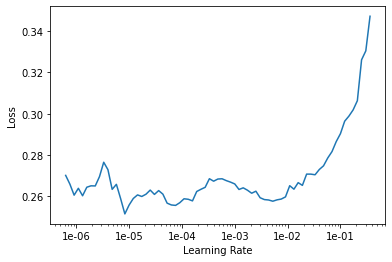

In [589]:
learn.recorder.plot()

In [582]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.270404,0.296646,0.870786,00:00
1,0.282408,0.321218,0.865169,00:00
2,0.273638,0.319436,0.870786,00:00


In [576]:
learn.save('stage-2')

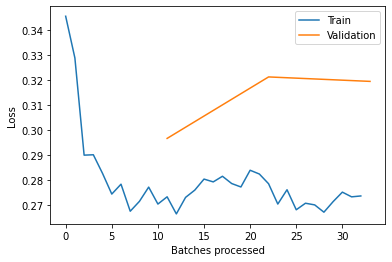

In [586]:
learn.recorder.plot_losses()

In [584]:
predictions = []

for n in range(len(test_data)):
    pred = learn.predict(test_data.iloc[n])
    pred = int(str(pred[0])[-1:])
    predictions.append(pred)
    
len(predictions)

418

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_fastai_v15.csv', index=False)
print("Your submission was successfully saved!")